## Distance to Annotation

In [1]:
## Parameters specific to where your folders are and your data
parameter_file = '../../parameters/params.yaml'
import yaml
import sys
import scipy.stats as stats
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

#data_folder = doc['data_folder']
#tissues = doc['tissues'].split(',')
#sys.path.append(doc['pipeline_path'])
ref_fa = doc['GENOME_FA']
#anno_gff=doc['annotation']


import os
from os.path import join
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from tss.visualize import plot_tss_results 
from tss.visualize.fig_utils import helper_save
## Plotting attributes
sns.set_style("whitegrid", {'axes.grid' : False})

from tss.data import annotation
from tss.visualize.fig_utils import helper_save

## Input

In [2]:
genome = "GCF"
tss_start = join(genome,'genome','start_site_mRNA.tsv')

## Output

In [3]:
os.chdir(doc["results"])

if not os.path.exists("distance_to_anno"):
    os.mkdir("distance_to_anno")
dist_to_anno_dir = join("distance_to_anno", genome)
if not os.path.exists(dist_to_anno_dir):
    os.mkdir(dist_to_anno_dir)

#dist_to_anno_dir = join(dist_to_anno_dir, "distance")

In [4]:
tss_annotation = pd.read_csv(tss_start,sep='\t',index_col=0)
tss_annotation

,Chr,Start,End,Strand,actual_start,ID,Parent,Dbxref,Name,gbkey,...,model_evidence,product,Note,exception,end_range,partial,start_range,inference,Length,transcript_id
XM_027386529.1,NW_020822366.1,722307,722309,-,722308,rna-XM_027386529.1,gene-Bmp4,"GeneID:100754303,Genbank:XM_027386529.1",XM_027386529.1,mRNA,...,Supporting evidence includes similarity to: 29...,bone morphogenetic protein 4%2C transcript var...,NaN,NaN,NaN,NaN,NaN,NaN,3,XM_027386529.1
XM_027386528.1,NW_020822366.1,724609,724611,-,724610,rna-XM_027386528.1,gene-Bmp4,"GeneID:100754303,Genbank:XM_027386528.1",XM_027386528.1,mRNA,...,Supporting evidence includes similarity to: 29...,bone morphogenetic protein 4%2C transcript var...,NaN,NaN,NaN,NaN,NaN,NaN,3,XM_027386528.1
XM_027386531.1,NW_020822366.1,1085434,1085436,+,1085435,rna-XM_027386531.1,gene-Cdkn3,"GeneID:100752216,Genbank:XM_027386531.1",XM_027386531.1,mRNA,...,Supporting evidence includes similarity to: 5 ...,cyclin dependent kinase inhibitor 3%2C transcr...,NaN,NaN,NaN,NaN,NaN,NaN,3,XM_027386531.1
XM_027386533.1,NW_020822366.1,1085743,1085745,+,1085744,rna-XM_027386533.1,gene-Cdkn3,"GeneID:100752216,Genbank:XM_027386533.1",XM_027386533.1,mRNA,...,Supporting evidence includes similarity to: 1 ...,cyclin dependent kinase inhibitor 3%2C transcr...,NaN,NaN,NaN,NaN,NaN,NaN,3,XM_027386533.1
XM_027386534.1,NW_020822366.1,1114412,1114414,-,1114413,rna-XM_027386534.1,gene-Cnih1,"GeneID:103160710,Genbank:XM_027386534.1",XM_027386534.1,mRNA,...,Supporting evidence includes similarity to: 10...,cornichon family AMPA receptor auxiliary prote...,NaN,NaN,NaN,NaN,NaN,NaN,3,XM_027386534.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XM_027434589.1,NW_020824185.1,3892,3894,+,3893,rna-XM_027434589.1,gene-LOC113839146,"GeneID:113839146,Genbank:XM_027434589.1",XM_027434589.1,mRNA,...,Supporting evidence includes similarity to: 3 ...,mothers against decapentaplegic homolog 1-like,NaN,NaN,NaN,True,".,3893",NaN,3,XM_027434589.1
XM_027434591.1,NW_020824186.1,17913,17915,+,17914,rna-XM_027434591.1,gene-LOC113839147,"GeneID:113839147,Genbank:XM_027434591.1",XM_027434591.1,mRNA,...,Supporting evidence includes similarity to: 6 ...,PRAME family member 12-like%2C transcript vari...,NaN,NaN,NaN,NaN,NaN,NaN,3,XM_027434591.1
XM_027434593.1,NW_020824186.1,29431,29433,+,29432,rna-XM_027434593.1,gene-LOC103158952,"GeneID:103158952,Genbank:XM_027434593.1",XM_027434593.1,mRNA,...,Supporting evidence includes similarity to: 2 ...,PRAME family member 12-like%2C transcript vari...,NaN,NaN,NaN,NaN,NaN,NaN,3,XM_027434593.1
XM_027434595.1,NW_020824188.1,2146,2148,+,2147,rna-XM_027434595.1,gene-LOC113839149,"GeneID:113839149,Genbank:XM_027434595.1",XM_027434595.1,mRNA,...,Supporting evidence includes similarity to: 25...,zinc finger protein 431-like%2C transcript var...,NaN,NaN,NaN,NaN,NaN,NaN,3,XM_027434595.1


In [5]:
len(tss_annotation["gene"].unique())

21387

# Using Output TSS1.exp.bed

In [6]:
peaks_file = join(genome, "eTSS/TSS.exp.bed")
meta_file = join(genome, "eTSS/TSS.exp.meta.tsv")
meta_df = pd.read_csv(meta_file,index_col=0,sep='\t')

peaks_with_dist = annotation.wrap_distance_to_landmarks(peaks_file, landmark_file=tss_start,
                          main_landmark = 'transcript_id',landmark_cols=[],is_bed=True,
                          output_f=None,is_parallel=True,num_par=12, use_prior=True, meta_f=meta_file)
peaks_with_dist

Mergeing meta
                                    Chr    Start      End      Stat Strand
ID                                                                        
p1@Bmp4_XM_027386529.1   NW_020822366.1   722208   722359  1.779596      -
p2@Bmp4_XM_027386529.1   NW_020822366.1   721599   721750  0.506505      -
p3@Bmp4_XM_027386529.1   NW_020822366.1   721832   721983  0.580925      -
p1@Bmp4_XM_027386528.1   NW_020822366.1   724533   724684  4.074290      -
p1@Cdkn3_XM_027386531.1  NW_020822366.1  1085431  1085582  1.212188      +
                                    Chr    Start      End      Stat Strand  \
p1@Bmp4_XM_027386529.1   NW_020822366.1   722208   722359  1.779596      -   
p2@Bmp4_XM_027386529.1   NW_020822366.1   721599   721750  0.506505      -   
p3@Bmp4_XM_027386529.1   NW_020822366.1   721832   721983  0.580925      -   
p1@Bmp4_XM_027386528.1   NW_020822366.1   724533   724684  4.074290      -   
p1@Cdkn3_XM_027386531.1  NW_020822366.1  1085431  1085582  1.212188    

,Chr,Start,End,Strand,Stat,Transcript,Gene,Nearest TSS,Distance to TSS,isSameStrand
p1@Bmp4_XM_027386529.1,NW_020822366.1,722208,722359,-,1.779596,XM_027386529.1,Bmp4,XM_027386529.1,25.0,True
p2@Bmp4_XM_027386529.1,NW_020822366.1,721599,721750,-,0.506505,XM_027386529.1,Bmp4,XM_027386529.1,634.0,True
p3@Bmp4_XM_027386529.1,NW_020822366.1,721832,721983,-,0.580925,XM_027386529.1,Bmp4,XM_027386529.1,401.0,True
p1@Bmp4_XM_027386528.1,NW_020822366.1,724533,724684,-,4.074290,XM_027386528.1,Bmp4,XM_027386528.1,2.0,True
p1@Cdkn3_XM_027386531.1,NW_020822366.1,1085431,1085582,+,1.212188,XM_027386531.1,Cdkn3,XM_027386531.1,71.0,True
...,...,...,...,...,...,...,...,...,...,...
p1@LOC113839076_XM_027434536.1,NW_020824066.1,29450,29601,+,0.667453,XM_027434536.1,LOC113839076,XM_027434536.1,-120.0,True
p1@LOC113839076_XM_027434535.1,NW_020824066.1,29879,30030,+,0.229426,XM_027434535.1,LOC113839076,XM_027434535.1,308.0,True
p1@LOC113839111_XM_027434561.1,NW_020824120.1,10402,10553,+,1.600973,XM_027434561.1,LOC113839111,XM_027434561.1,16.0,True
p2@LOC113839111_XM_027434561.1,NW_020824120.1,9878,10029,+,0.574031,XM_027434561.1,LOC113839111,XM_027434561.1,-508.0,True


In [7]:
# peaks_file = join(genome, "eTSS/TSS.exp.bed")
# meta_file = join(genome, "eTSS/TSS.exp.meta.tsv")
# meta_df = pd.read_csv(meta_file,index_col=0,sep='\t')

# peaks_with_dist = annotation.wrap_distance_to_landmarks(peaks_file, landmark_file=tss_start,
#                           main_landmark = 'transcript_id',landmark_cols=[],is_bed=True,
#                           output_f=None,is_parallel=True,num_par=12)

In [8]:
peaks_with_dist

,Chr,Start,End,Strand,Stat,Transcript,Gene,Nearest TSS,Distance to TSS,isSameStrand
p1@Bmp4_XM_027386529.1,NW_020822366.1,722208,722359,-,1.779596,XM_027386529.1,Bmp4,XM_027386529.1,25.0,True
p2@Bmp4_XM_027386529.1,NW_020822366.1,721599,721750,-,0.506505,XM_027386529.1,Bmp4,XM_027386529.1,634.0,True
p3@Bmp4_XM_027386529.1,NW_020822366.1,721832,721983,-,0.580925,XM_027386529.1,Bmp4,XM_027386529.1,401.0,True
p1@Bmp4_XM_027386528.1,NW_020822366.1,724533,724684,-,4.074290,XM_027386528.1,Bmp4,XM_027386528.1,2.0,True
p1@Cdkn3_XM_027386531.1,NW_020822366.1,1085431,1085582,+,1.212188,XM_027386531.1,Cdkn3,XM_027386531.1,71.0,True
...,...,...,...,...,...,...,...,...,...,...
p1@LOC113839076_XM_027434536.1,NW_020824066.1,29450,29601,+,0.667453,XM_027434536.1,LOC113839076,XM_027434536.1,-120.0,True
p1@LOC113839076_XM_027434535.1,NW_020824066.1,29879,30030,+,0.229426,XM_027434535.1,LOC113839076,XM_027434535.1,308.0,True
p1@LOC113839111_XM_027434561.1,NW_020824120.1,10402,10553,+,1.600973,XM_027434561.1,LOC113839111,XM_027434561.1,16.0,True
p2@LOC113839111_XM_027434561.1,NW_020824120.1,9878,10029,+,0.574031,XM_027434561.1,LOC113839111,XM_027434561.1,-508.0,True


In [9]:
#peaks_with_dist = peaks_with_dist.merge(meta_df[["Gene","Transcript"]],left_index=True,right_index=True)
peaks_with_dist["Absolute"] = np.abs(peaks_with_dist["Distance to TSS"])
peaks_with_dist

,Chr,Start,End,Strand,Stat,Transcript,Gene,Nearest TSS,Distance to TSS,isSameStrand,Absolute
p1@Bmp4_XM_027386529.1,NW_020822366.1,722208,722359,-,1.779596,XM_027386529.1,Bmp4,XM_027386529.1,25.0,True,25.0
p2@Bmp4_XM_027386529.1,NW_020822366.1,721599,721750,-,0.506505,XM_027386529.1,Bmp4,XM_027386529.1,634.0,True,634.0
p3@Bmp4_XM_027386529.1,NW_020822366.1,721832,721983,-,0.580925,XM_027386529.1,Bmp4,XM_027386529.1,401.0,True,401.0
p1@Bmp4_XM_027386528.1,NW_020822366.1,724533,724684,-,4.074290,XM_027386528.1,Bmp4,XM_027386528.1,2.0,True,2.0
p1@Cdkn3_XM_027386531.1,NW_020822366.1,1085431,1085582,+,1.212188,XM_027386531.1,Cdkn3,XM_027386531.1,71.0,True,71.0
...,...,...,...,...,...,...,...,...,...,...,...
p1@LOC113839076_XM_027434536.1,NW_020824066.1,29450,29601,+,0.667453,XM_027434536.1,LOC113839076,XM_027434536.1,-120.0,True,120.0
p1@LOC113839076_XM_027434535.1,NW_020824066.1,29879,30030,+,0.229426,XM_027434535.1,LOC113839076,XM_027434535.1,308.0,True,308.0
p1@LOC113839111_XM_027434561.1,NW_020824120.1,10402,10553,+,1.600973,XM_027434561.1,LOC113839111,XM_027434561.1,16.0,True,16.0
p2@LOC113839111_XM_027434561.1,NW_020824120.1,9878,10029,+,0.574031,XM_027434561.1,LOC113839111,XM_027434561.1,-508.0,True,508.0


In [10]:
peaks_with_dist[~(peaks_with_dist["Nearest TSS"].isin(meta_df["Transcript"]))]

,Chr,Start,End,Strand,Stat,Transcript,Gene,Nearest TSS,Distance to TSS,isSameStrand,Absolute


## Txn

(20628, 11)
(20627, 11)


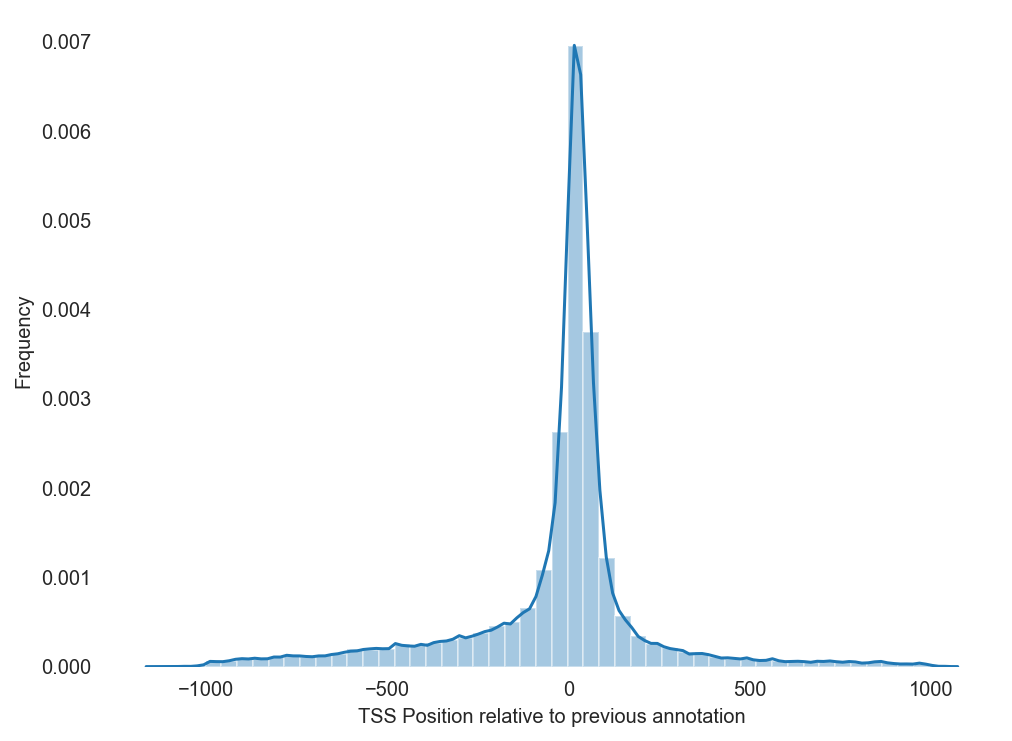

In [11]:
dist_to_txn = peaks_with_dist[peaks_with_dist['Absolute'] == peaks_with_dist.groupby('Nearest TSS')['Absolute'].transform('min')]
print(dist_to_txn.shape)
dist_to_txn = dist_to_txn[~(dist_to_txn.duplicated(subset="Nearest TSS",keep='first'))]
print(dist_to_txn.shape)
sns.distplot(dist_to_txn['Distance to TSS'])



plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

helper_save(join(dist_to_anno_dir, "minimum_for_each_ncbi_transcript"))


# print("Mean: %s" % (np.mean(dist_to_txn["Distance to TSS"])))
# print("Std: %s" % (np.std(dist_to_txn["Distance to TSS"])))
# print("Mode: %s" % (stats.mode(dist_to_txn["Distance to TSS"])[0][0]))
# print("Median: %s" % (np.median(dist_to_txn["Distance to TSS"])))

# print("Number of TSSs in concordance with Reference", (dist_to_txn["Distance to TSS"]==0).sum())
# print("Number of TSSs less than 10nts from Reference", np.abs((dist_to_txn["Distance to TSS"])<10).sum())
# print("Number of TSSs less than 150nts from Reference", np.abs((dist_to_txn["Distance to TSS"])<150).sum())

# print("Total number of TSSs", len(dist_to_txn))
# print("Absolute Mean: %s" % (np.mean(np.abs(dist_to_txn["Distance to TSS"]))))
# print("Absolute Std: %s" % (np.std(np.abs(dist_to_txn["Distance to TSS"]))))



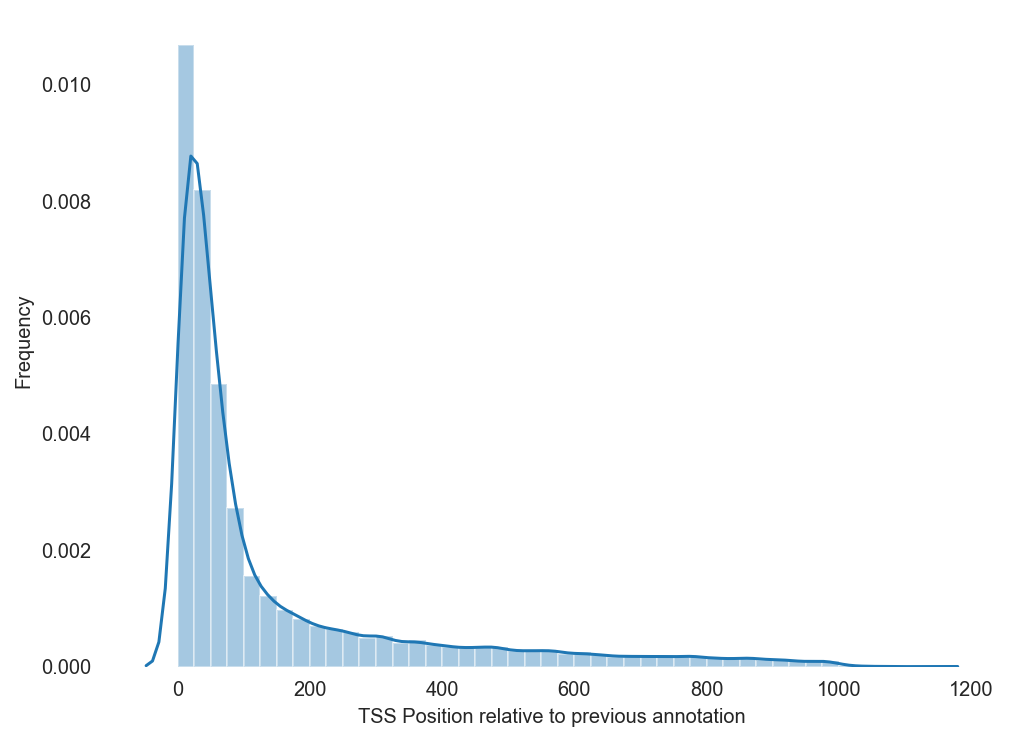

In [12]:
sns.distplot(np.abs(dist_to_txn['Distance to TSS']),bins=np.arange(0,1200,25))
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')
helper_save(join(dist_to_anno_dir, "absolute_minimum_for_each_ncbi_transcript"))


## Gene

In [13]:
peaks_with_dist

,Chr,Start,End,Strand,Stat,Transcript,Gene,Nearest TSS,Distance to TSS,isSameStrand,Absolute
p1@Bmp4_XM_027386529.1,NW_020822366.1,722208,722359,-,1.779596,XM_027386529.1,Bmp4,XM_027386529.1,25.0,True,25.0
p2@Bmp4_XM_027386529.1,NW_020822366.1,721599,721750,-,0.506505,XM_027386529.1,Bmp4,XM_027386529.1,634.0,True,634.0
p3@Bmp4_XM_027386529.1,NW_020822366.1,721832,721983,-,0.580925,XM_027386529.1,Bmp4,XM_027386529.1,401.0,True,401.0
p1@Bmp4_XM_027386528.1,NW_020822366.1,724533,724684,-,4.074290,XM_027386528.1,Bmp4,XM_027386528.1,2.0,True,2.0
p1@Cdkn3_XM_027386531.1,NW_020822366.1,1085431,1085582,+,1.212188,XM_027386531.1,Cdkn3,XM_027386531.1,71.0,True,71.0
...,...,...,...,...,...,...,...,...,...,...,...
p1@LOC113839076_XM_027434536.1,NW_020824066.1,29450,29601,+,0.667453,XM_027434536.1,LOC113839076,XM_027434536.1,-120.0,True,120.0
p1@LOC113839076_XM_027434535.1,NW_020824066.1,29879,30030,+,0.229426,XM_027434535.1,LOC113839076,XM_027434535.1,308.0,True,308.0
p1@LOC113839111_XM_027434561.1,NW_020824120.1,10402,10553,+,1.600973,XM_027434561.1,LOC113839111,XM_027434561.1,16.0,True,16.0
p2@LOC113839111_XM_027434561.1,NW_020824120.1,9878,10029,+,0.574031,XM_027434561.1,LOC113839111,XM_027434561.1,-508.0,True,508.0


(15308, 11)


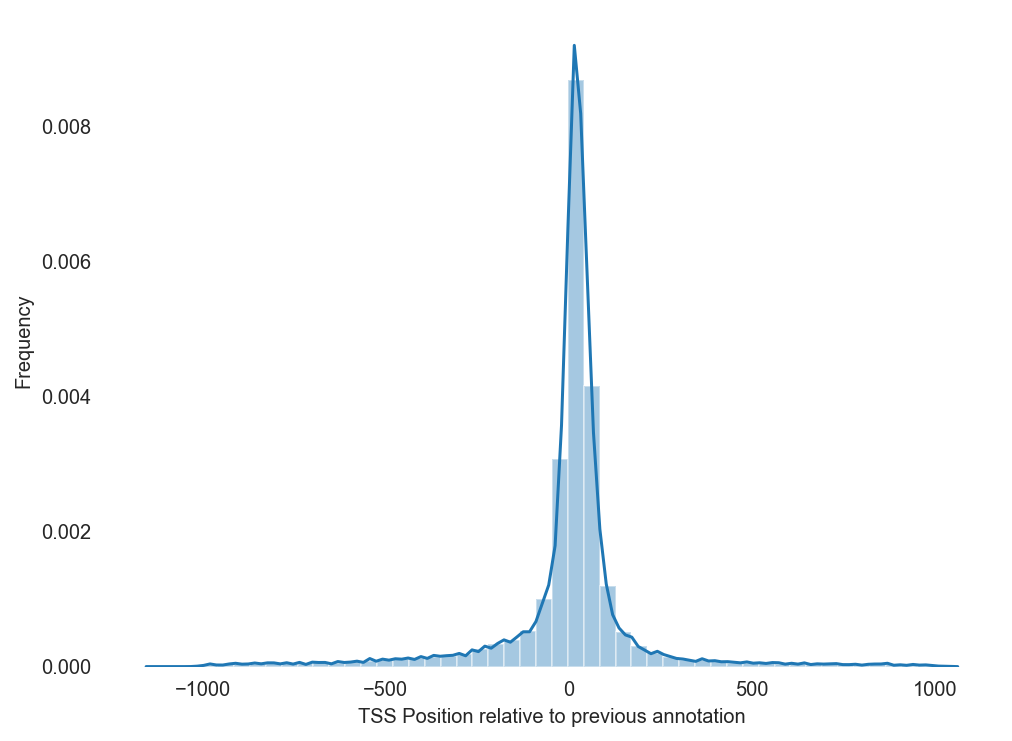

In [14]:
dist_to_gene = peaks_with_dist[peaks_with_dist['Absolute'] == peaks_with_dist.groupby('Gene')['Absolute'].transform('min')]
dist_to_gene = dist_to_gene[~(dist_to_gene.duplicated(subset="Gene",keep='first'))]
print(dist_to_gene.shape)

sns.distplot(dist_to_gene['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

helper_save(join(dist_to_anno_dir, "minimum_for_each_ncbi_gene"))

# print("Mean: %s" % (np.mean(dist_to_gene["Distance to TSS"])))
# print("Std: %s" % (np.std(dist_to_gene["Distance to TSS"])))
# print("Mode: %s" % (stats.mode(dist_to_gene["Distance to TSS"])[0][0]))
# print("Median: %s" % (np.median(dist_to_gene["Distance to TSS"])))

# print("Number of TSSs in concordance with Reference", (dist_to_gene["Distance to TSS"]==0).sum())
# print("Number of TSSs less than 10nts from Reference", np.abs((dist_to_gene["Distance to TSS"])<10).sum())
# print("Number of TSSs less than 150nts from Reference", np.abs((dist_to_gene["Distance to TSS"])<150).sum())

# print("Total number of Genes", len(dist_to_gene))
# print("Absolute Mean: %s" % (np.mean(np.abs(dist_to_gene["Distance to TSS"]))))
# print("Absolute Std: %s" % (np.std(np.abs(dist_to_gene["Distance to TSS"]))))



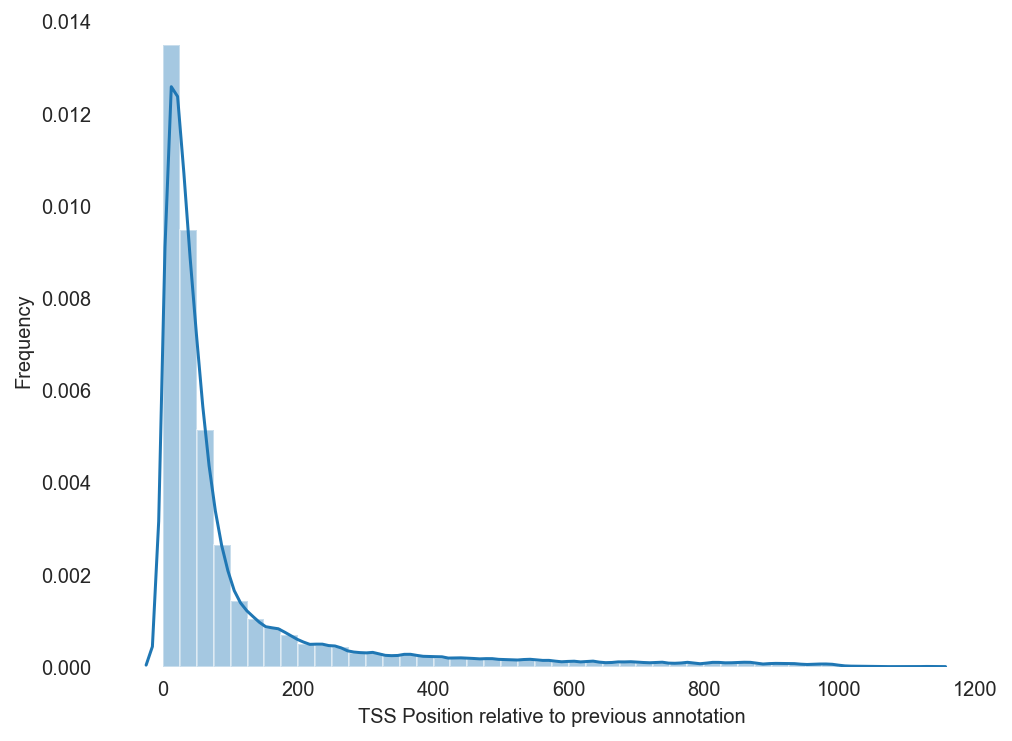

In [15]:
sns.distplot(np.abs(dist_to_gene['Distance to TSS']),bins=np.arange(0,1200,25))
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')
helper_save(join(dist_to_anno_dir, "absolute_minimum_for_each_ncbi_gene"))


## mRNA TSS

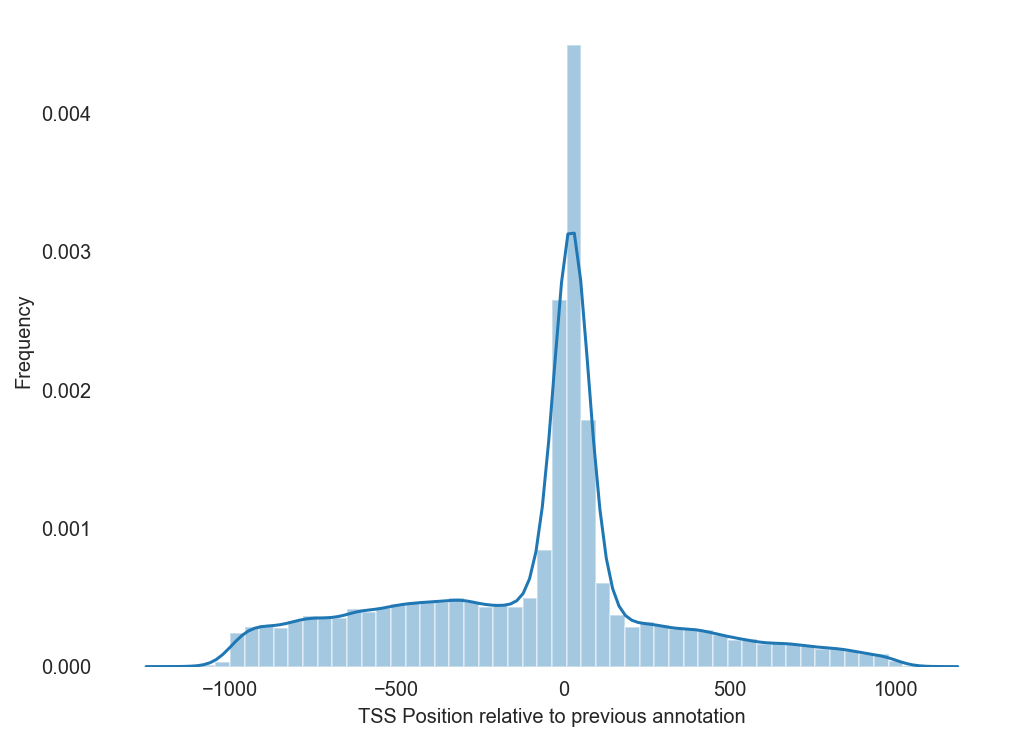

In [16]:
sns.distplot(peaks_with_dist['Distance to TSS'])

concordant = peaks_with_dist[peaks_with_dist['Distance to TSS']==0]
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

helper_save(join(dist_to_anno_dir, "all_promoter_peaks"))

# print("Mean: %s" % (np.mean(peaks_with_dist["Distance to TSS"])))
# print("Std: %s" % (np.std(peaks_with_dist["Distance to TSS"])))
# print("Mode: %s" % (stats.mode(peaks_with_dist["Distance to TSS"])[0][0]))
# print("Median: %s" % (np.median(peaks_with_dist["Distance to TSS"])))

# print("Number of TSSs in concordance with Reference", (peaks_with_dist["Distance to TSS"]==0).sum())
# print("Number of TSSs in concordance with Reference (off by 1)", (peaks_with_dist["Distance to TSS"]==1).sum())
# print("Number of TSSs in concordance with Reference (off by 2)", (peaks_with_dist["Distance to TSS"]==2).sum())
# print("Number of TSSs in concordance with Reference (off by 1 abs)", (np.abs(peaks_with_dist["Distance to TSS"])==1).sum())
# print("Number of TSSs in concordance with Reference (off by 2 abs)", (np.abs(peaks_with_dist["Distance to TSS"])==1).sum())


# print("Number of TSSs less than 10nts from Reference", np.abs((peaks_with_dist["Distance to TSS"])<10).sum())
# print("Total number of TSSs", len(peaks_with_dist))
# print("Absolute Mean: %s" % (np.mean(np.abs(peaks_with_dist["Distance to TSS"]))))
# print("Absolute Std: %s" % (np.std(np.abs(peaks_with_dist["Distance to TSS"]))))



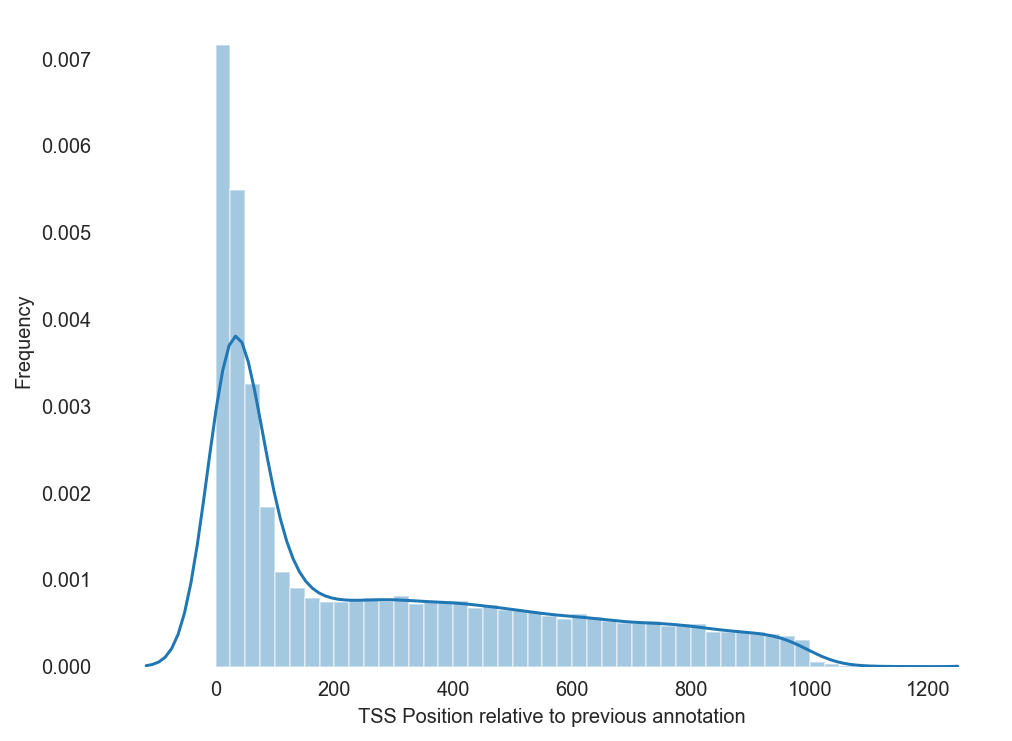

In [17]:
sns.distplot(np.abs(peaks_with_dist['Distance to TSS']),bins=np.arange(0,1200,25))
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')
helper_save(join(dist_to_anno_dir, "absolute_all_promoter_peaks"))


## Make stats page

In [18]:
stats = pd.DataFrame(index=["Total observed mRNA TSS", "Protein coding TSS", "Gene"], 
             columns=["NCBI annotation", "Total", "Mean Distance","Median Distance", "Mode Distance", "Standard Deviation Distance",
                      "Mean absolute Distance","Median absolute Distance", "Mode absolute Distance","Standard Deviation absolute Distance",
                      "Number of TSS in concordance", "Number of TSS <= 10nt", "Number of TSS <= 150nt", "Number of TSS > 150nt"])
stats

,NCBI annotation,Total,Mean Distance,Median Distance,Mode Distance,Standard Deviation Distance,Mean absolute Distance,Median absolute Distance,Mode absolute Distance,Standard Deviation absolute Distance,Number of TSS in concordance,Number of TSS <= 10nt,Number of TSS <= 150nt,Number of TSS > 150nt
Total observed mRNA TSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protein coding TSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
stats.loc["Gene"] = [np.nan,len(dist_to_gene), 
                     np.mean(dist_to_gene["Distance to TSS"]),
                     np.median(dist_to_gene["Distance to TSS"]),
                     dist_to_gene["Distance to TSS"].mode().values[0],
                     np.std(dist_to_gene["Distance to TSS"]),
                     
                     np.mean(dist_to_gene["Absolute"]),
                     np.median(dist_to_gene["Absolute"]),
                     dist_to_gene["Absolute"].mode().values[0],
                     np.std(dist_to_gene["Absolute"]),
                     
                    len(concordant.groupby("Gene")),
                    np.abs((dist_to_gene["Distance to TSS"])<=10).sum(),
                    np.abs((dist_to_gene["Distance to TSS"])<=150).sum(),
                    np.abs((dist_to_gene["Distance to TSS"])>150).sum()
                    ]


stats.loc["Protein coding TSS"] = [np.nan,len(dist_to_txn), 
                     np.mean(dist_to_txn["Distance to TSS"]),
                     np.median(dist_to_txn["Distance to TSS"]),
                     dist_to_txn["Distance to TSS"].mode().values[0],
                     np.std(dist_to_txn["Distance to TSS"]),
                     
                     np.mean(dist_to_txn["Absolute"]),
                     np.median(dist_to_txn["Absolute"]),
                     dist_to_txn["Absolute"].mode().values[0],
                     np.std(dist_to_txn["Absolute"]),
                     
                    len(concordant.groupby("Nearest TSS")),
                    np.abs((dist_to_txn["Distance to TSS"])<=10).sum(),
                    np.abs((dist_to_txn["Distance to TSS"])<=150).sum(),
                    np.abs((dist_to_txn["Distance to TSS"])>150).sum()
                    ]


stats.loc["Total observed mRNA TSS"] = [np.nan,len(peaks_with_dist), 
                     np.mean(peaks_with_dist["Distance to TSS"]),
                     np.median(peaks_with_dist["Distance to TSS"]),
                     peaks_with_dist["Distance to TSS"].mode().values[0],
                     np.std(peaks_with_dist["Distance to TSS"]),
                     
                     np.mean(peaks_with_dist["Absolute"]),
                     np.median(peaks_with_dist["Absolute"]),
                     peaks_with_dist["Absolute"].mode().values[0],
                     np.std(peaks_with_dist["Absolute"]),
                     
                    (peaks_with_dist["Distance to TSS"]==0).sum(),
                    np.abs((peaks_with_dist["Distance to TSS"])<=10).sum(),
                    np.abs((peaks_with_dist["Distance to TSS"])<=150).sum(),
                    np.abs((peaks_with_dist["Distance to TSS"])>150).sum()
                    ]
stats

,NCBI annotation,Total,Mean Distance,Median Distance,Mode Distance,Standard Deviation Distance,Mean absolute Distance,Median absolute Distance,Mode absolute Distance,Standard Deviation absolute Distance,Number of TSS in concordance,Number of TSS <= 10nt,Number of TSS <= 150nt,Number of TSS > 150nt
Total observed mRNA TSS,NaN,30760,-89.2096,4,23,396.578,283.881,158,16,290.937,138,16233,25499,5261
Protein coding TSS,NaN,20627,-26.3978,16,23,253.168,146.845,54,16,207.913,138,9433,18650,1977
Gene,NaN,15308,3.48876,19,13,193.338,100.608,40,13,165.136,136,6387,14189,1119


## Add old annotation

In [20]:
tss_df = pd.read_csv(tss_start,sep='\t', index_col=0)
tss_df.shape

(35679, 21)

In [21]:
stats.at["Gene", "NCBI annotation"] = len(tss_df.groupby("Parent"))
stats.at["Protein coding TSS","NCBI annotation"] = tss_df.shape[0]
stats.at["mRNA","NCBI annotation"] = 46750

stats

,NCBI annotation,Total,Mean Distance,Median Distance,Mode Distance,Standard Deviation Distance,Mean absolute Distance,Median absolute Distance,Mode absolute Distance,Standard Deviation absolute Distance,Number of TSS in concordance,Number of TSS <= 10nt,Number of TSS <= 150nt,Number of TSS > 150nt
Total observed mRNA TSS,NaN,30760,-89.2096,4,23,396.578,283.881,158,16,290.937,138,16233,25499,5261
Protein coding TSS,35679,20627,-26.3978,16,23,253.168,146.845,54,16,207.913,138,9433,18650,1977
Gene,21488,15308,3.48876,19,13,193.338,100.608,40,13,165.136,136,6387,14189,1119
mRNA,46750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
stats.to_csv(join(dist_to_anno_dir, "TSS_distance_stats.csv"))

## Add in ncRNAs